In [1]:
import numpy as np
import pandas as pd
import plumed
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Energy Minimization

In [8]:
%%bash
module unload gcc
module load gromacs
echo 10 | gmx_mpi energy -f min.edr -o min_PE.xvg
echo 10 | gmx_mpi energy -f min2.edr -o min2_PE.xvg

Loading gromacs/gcc/2020.3
  Loading requirement: gcc/7.5.0 cuda10.0/toolkit/10.0.130 openmpi/gcc/64/1.10.7
[cpu139:263546] mca: base: component_find: unable to open /cm/shared/apps/openmpi/gcc/64/1.10.7/lib64/openmpi/mca_mtl_psm: libpsm_infinipath.so.1: cannot open shared object file: No such file or directory (ignored)


--------------------------------------------------------------------------
detected:

  Local host:            cpu139
  Device name:           mlx5_0
  Device vendor ID:      0x02c9
  Device vendor part ID: 4123

Default device parameters will be used, which may result in lower
performance.  You can edit any of the files specified by the
btl_openib_device_param_files MCA parameter to set values for your
device.

NOTE: You can turn off this warning by setting the MCA parameter
      btl_openib_warn_no_device_params_found to 0.
--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   cpu139
  Local device: mlx5_0
--------------------------------------------------------------------------


                      :-) GROMACS - gmx energy, 2020.3 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     


Statistics over 1000 steps [ 0.0000 through 999.0000 ps ], 1 data sets
All statistics are over 790 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                9.39727e+06    9.5e+06 2.62256e+08 -5.6465e+07  (kJ/mol)


[cpu139:263551] mca: base: component_find: unable to open /cm/shared/apps/openmpi/gcc/64/1.10.7/lib64/openmpi/mca_mtl_psm: libpsm_infinipath.so.1: cannot open shared object file: No such file or directory (ignored)


--------------------------------------------------------------------------
detected:

  Local host:            cpu139
  Device name:           mlx5_0
  Device vendor ID:      0x02c9
  Device vendor part ID: 4123

Default device parameters will be used, which may result in lower
performance.  You can edit any of the files specified by the
btl_openib_device_param_files MCA parameter to set values for your
device.

NOTE: You can turn off this warning by setting the MCA parameter
      btl_openib_warn_no_device_params_found to 0.
--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   cpu139
  Local device: mlx5_0
--------------------------------------------------------------------------


                      :-) GROMACS - gmx energy, 2020.3 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     


Statistics over 11463 steps [ 0.0000 through 11462.0000 ps ], 1 data sets
All statistics are over 9072 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -30891.1        220    473.064   -1460.43  (kJ/mol)


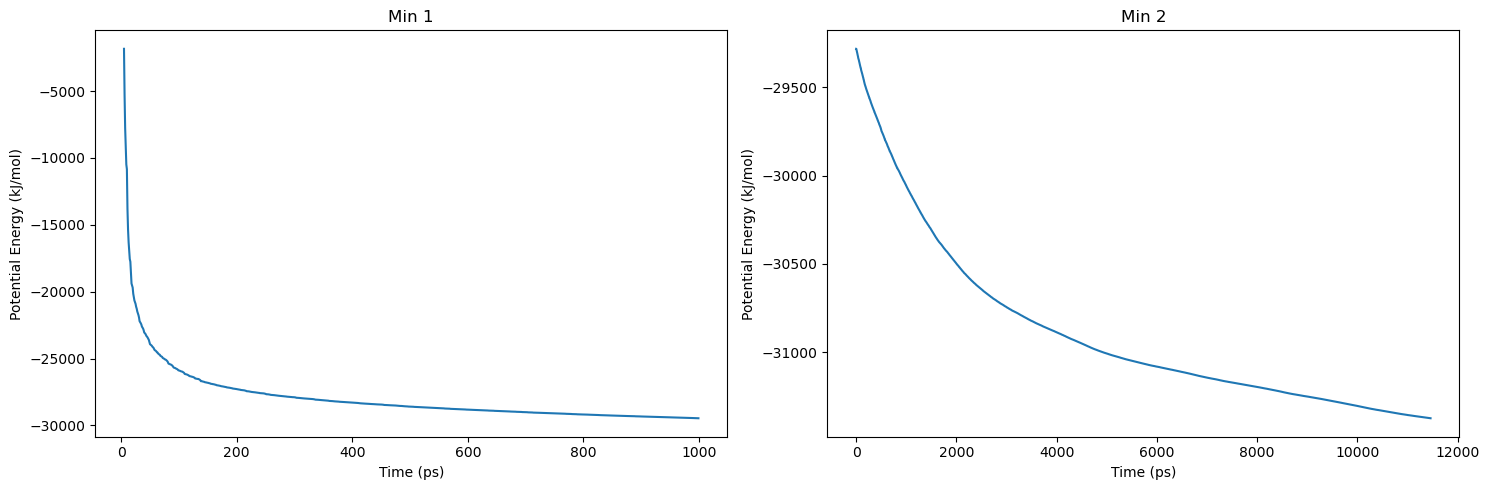

In [16]:
min1_x,min1_y = np.loadtxt('min_PE.xvg', skiprows=29, unpack=True)
min2_x,min2_y = np.loadtxt('min2_PE.xvg', skiprows=24, unpack=True)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(min1_x,min1_y)
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Potential Energy (kJ/mol)')
ax1.set_title('Min 1')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(min2_x,min2_y)
ax2.set_xlabel('Time (ps)')
ax2.set_ylabel('Potential Energy (kJ/mol)')
ax2.set_title('Min 2')
plt.tight_layout()

# Equilibration

In [18]:
%%bash
module unload gcc
module load gromacs
echo Temperature | gmx_mpi energy -f eql.edr -o nvt.xvg
echo Pressure | gmx_mpi energy -f eql2.edr -o npt.xvg

Loading gromacs/gcc/2020.3
  Loading requirement: gcc/7.5.0 cuda10.0/toolkit/10.0.130 openmpi/gcc/64/1.10.7
[cpu139:265491] mca: base: component_find: unable to open /cm/shared/apps/openmpi/gcc/64/1.10.7/lib64/openmpi/mca_mtl_psm: libpsm_infinipath.so.1: cannot open shared object file: No such file or directory (ignored)


--------------------------------------------------------------------------
detected:

  Local host:            cpu139
  Device name:           mlx5_0
  Device vendor ID:      0x02c9
  Device vendor part ID: 4123

Default device parameters will be used, which may result in lower
performance.  You can edit any of the files specified by the
btl_openib_device_param_files MCA parameter to set values for your
device.

NOTE: You can turn off this warning by setting the MCA parameter
      btl_openib_warn_no_device_params_found to 0.
--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   cpu139
  Local device: mlx5_0
--------------------------------------------------------------------------


                      :-) GROMACS - gmx energy, 2020.3 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 298.113        0.3    19.7831   -0.42089  (K)


[cpu139:265495] mca: base: component_find: unable to open /cm/shared/apps/openmpi/gcc/64/1.10.7/lib64/openmpi/mca_mtl_psm: libpsm_infinipath.so.1: cannot open shared object file: No such file or directory (ignored)


--------------------------------------------------------------------------
detected:

  Local host:            cpu139
  Device name:           mlx5_0
  Device vendor ID:      0x02c9
  Device vendor part ID: 4123

Default device parameters will be used, which may result in lower
performance.  You can edit any of the files specified by the
btl_openib_device_param_files MCA parameter to set values for your
device.

NOTE: You can turn off this warning by setting the MCA parameter
      btl_openib_warn_no_device_params_found to 0.
--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   cpu139
  Local device: mlx5_0
--------------------------------------------------------------------------


                      :-) GROMACS - gmx energy, 2020.3 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     


Statistics over 500001 steps [ 0.0000 through 1000.0000 ps ], 1 data sets
All statistics are over 5001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Pressure                    8.98672        7.9    538.998   -3.28165  (bar)


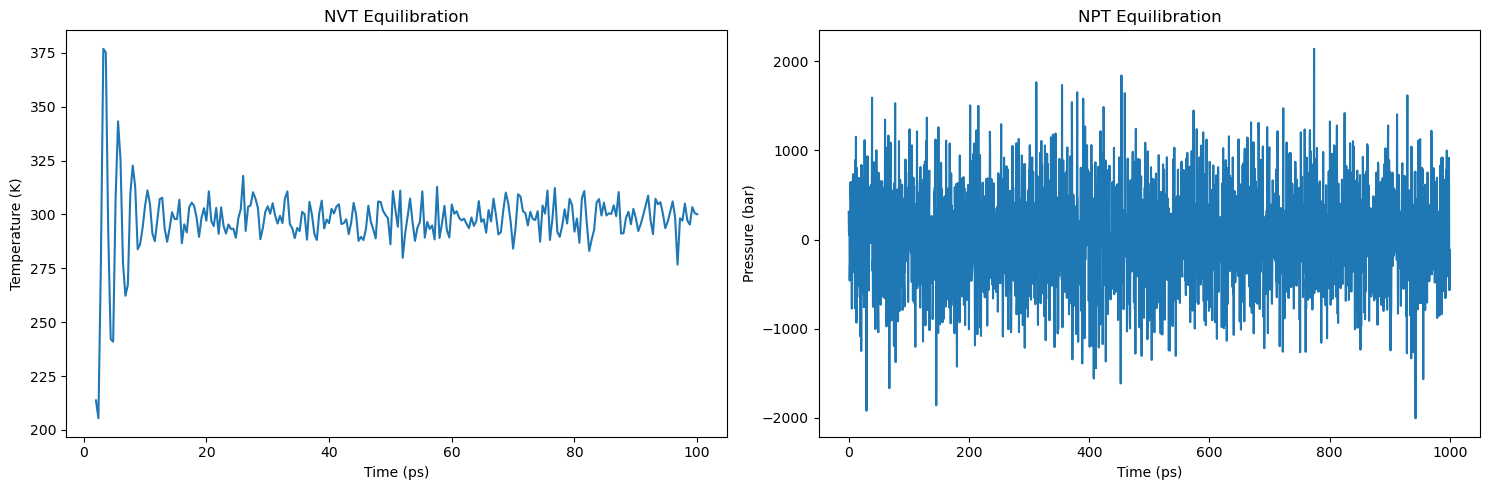

In [19]:
eql1_x,eql1_y = np.loadtxt('nvt.xvg', skiprows=29, unpack=True)
eql2_x,eql2_y = np.loadtxt('npt.xvg', skiprows=24, unpack=True)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(eql1_x,eql1_y)
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Temperature (K)')
ax1.set_title('NVT Equilibration')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(eql2_x,eql2_y)
ax2.set_xlabel('Time (ps)')
ax2.set_ylabel('Pressure (bar)')
ax2.set_title('NPT Equilibration')
plt.tight_layout()

# Production Analysis

In [20]:
%%bash
module unload gcc
module load gromacs
echo Temperature | gmx_mpi energy -f prd.edr -o prd_temp.xvg
echo Pressure | gmx_mpi energy -f prd.edr -o prd_press.xvg
echo Potential | gmx_mpi energy -f prd.edr -o prd_PE.xvg
echo Kinetic-En. | gmx_mpi energy -f prd.edr -o prd_KE.xvg

Loading gromacs/gcc/2020.3
  Loading requirement: gcc/7.5.0 cuda10.0/toolkit/10.0.130 openmpi/gcc/64/1.10.7
[cpu139:266515] mca: base: component_find: unable to open /cm/shared/apps/openmpi/gcc/64/1.10.7/lib64/openmpi/mca_mtl_psm: libpsm_infinipath.so.1: cannot open shared object file: No such file or directory (ignored)


--------------------------------------------------------------------------
detected:

  Local host:            cpu139
  Device name:           mlx5_0
  Device vendor ID:      0x02c9
  Device vendor part ID: 4123

Default device parameters will be used, which may result in lower
performance.  You can edit any of the files specified by the
btl_openib_device_param_files MCA parameter to set values for your
device.

NOTE: You can turn off this warning by setting the MCA parameter
      btl_openib_warn_no_device_params_found to 0.
--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   cpu139
  Local device: mlx5_0
--------------------------------------------------------------------------


                      :-) GROMACS - gmx energy, 2020.3 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     


Statistics over 5000001 steps [ 0.0000 through 10000.0000 ps ], 1 data sets
All statistics are over 50001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 298.141      0.018    6.99988 -0.0899681  (K)


[cpu139:266519] mca: base: component_find: unable to open /cm/shared/apps/openmpi/gcc/64/1.10.7/lib64/openmpi/mca_mtl_psm: libpsm_infinipath.so.1: cannot open shared object file: No such file or directory (ignored)


--------------------------------------------------------------------------
detected:

  Local host:            cpu139
  Device name:           mlx5_0
  Device vendor ID:      0x02c9
  Device vendor part ID: 4123

Default device parameters will be used, which may result in lower
performance.  You can edit any of the files specified by the
btl_openib_device_param_files MCA parameter to set values for your
device.

NOTE: You can turn off this warning by setting the MCA parameter
      btl_openib_warn_no_device_params_found to 0.
--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   cpu139
  Local device: mlx5_0
--------------------------------------------------------------------------


                      :-) GROMACS - gmx energy, 2020.3 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     


Statistics over 5000001 steps [ 0.0000 through 10000.0000 ps ], 1 data sets
All statistics are over 50001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Pressure                    2.00104        1.8    533.183    11.9521  (bar)


[cpu139:266524] mca: base: component_find: unable to open /cm/shared/apps/openmpi/gcc/64/1.10.7/lib64/openmpi/mca_mtl_psm: libpsm_infinipath.so.1: cannot open shared object file: No such file or directory (ignored)


--------------------------------------------------------------------------
detected:

  Local host:            cpu139
  Device name:           mlx5_0
  Device vendor ID:      0x02c9
  Device vendor part ID: 4123

Default device parameters will be used, which may result in lower
performance.  You can edit any of the files specified by the
btl_openib_device_param_files MCA parameter to set values for your
device.

NOTE: You can turn off this warning by setting the MCA parameter
      btl_openib_warn_no_device_params_found to 0.
--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   cpu139
  Local device: mlx5_0
--------------------------------------------------------------------------


                      :-) GROMACS - gmx energy, 2020.3 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     


Statistics over 5000001 steps [ 0.0000 through 10000.0000 ps ], 1 data sets
All statistics are over 50001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -25748.6       0.91    179.116    2.89235  (kJ/mol)


[cpu139:266528] mca: base: component_find: unable to open /cm/shared/apps/openmpi/gcc/64/1.10.7/lib64/openmpi/mca_mtl_psm: libpsm_infinipath.so.1: cannot open shared object file: No such file or directory (ignored)


--------------------------------------------------------------------------
detected:

  Local host:            cpu139
  Device name:           mlx5_0
  Device vendor ID:      0x02c9
  Device vendor part ID: 4123

Default device parameters will be used, which may result in lower
performance.  You can edit any of the files specified by the
btl_openib_device_param_files MCA parameter to set values for your
device.

NOTE: You can turn off this warning by setting the MCA parameter
      btl_openib_warn_no_device_params_found to 0.
--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   cpu139
  Local device: mlx5_0
--------------------------------------------------------------------------


                      :-) GROMACS - gmx energy, 2020.3 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     


Statistics over 5000001 steps [ 0.0000 through 10000.0000 ps ], 1 data sets
All statistics are over 50001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Kinetic En.                 4671.45       0.29    109.678   -1.40968  (kJ/mol)


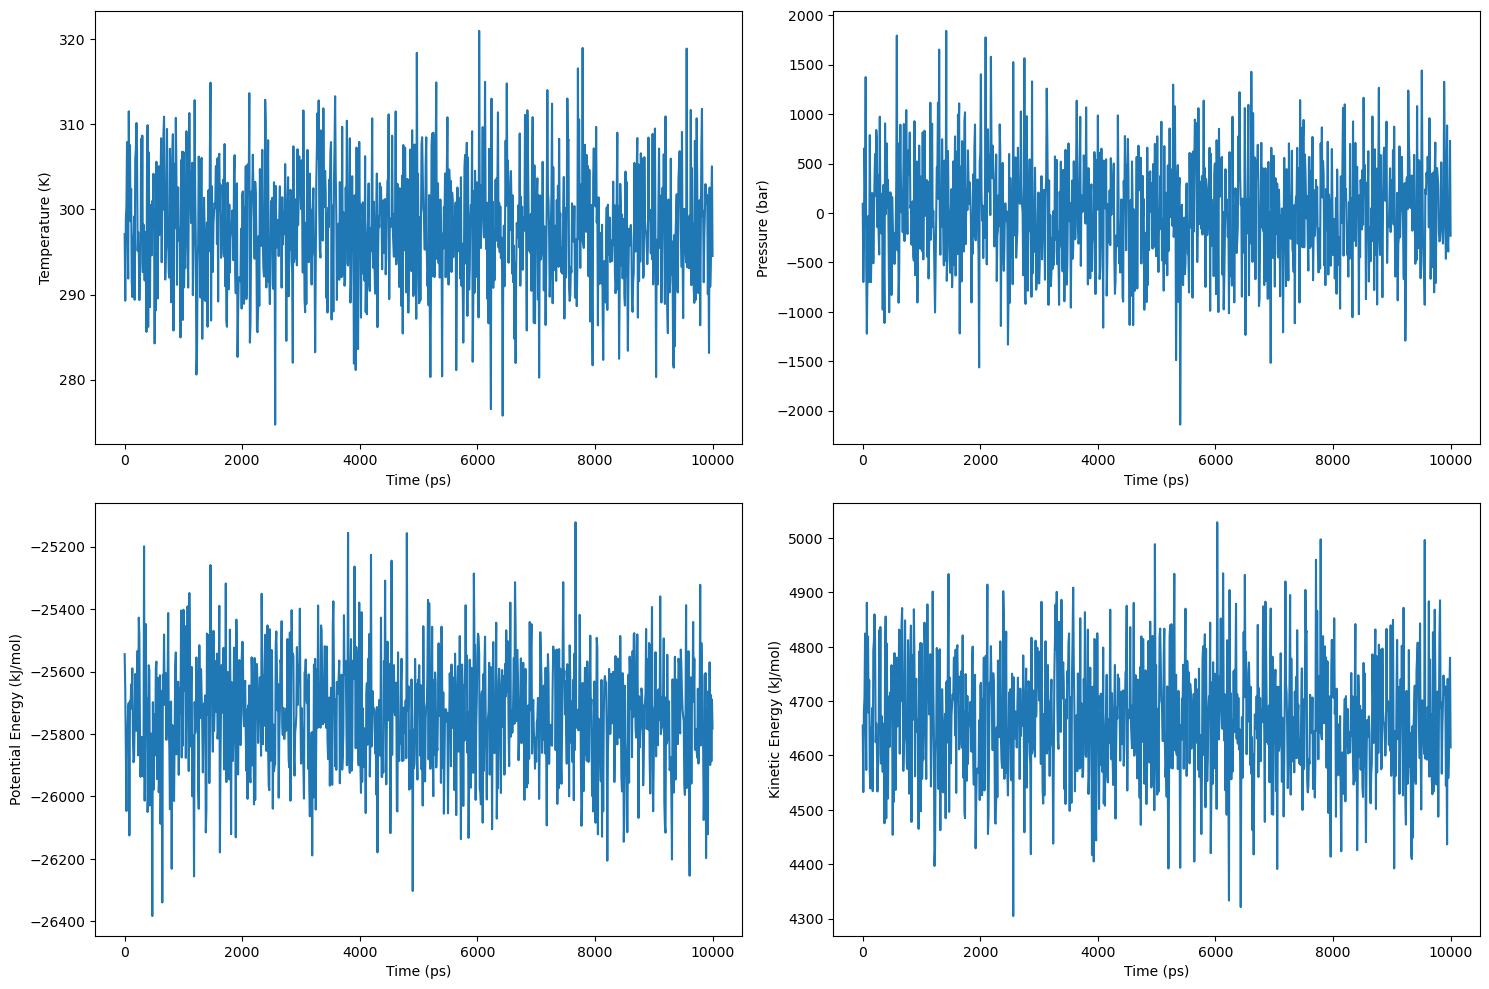

In [2]:
temp_x,temp_y = np.loadtxt('prd_temp.xvg', skiprows=24, unpack=True)
press_x,press_y = np.loadtxt('prd_press.xvg', skiprows=24, unpack=True)
PE_x,PE_y = np.loadtxt('prd_PE.xvg', skiprows=24, unpack=True)
KE_x,KE_y = np.loadtxt('prd_KE.xvg', skiprows=24, unpack=True)

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(temp_x,temp_y)
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Temperature (K)')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(press_x,press_y)
ax2.set_xlabel('Time (ps)')
ax2.set_ylabel('Pressure (bar)')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(PE_x,PE_y)
ax3.set_xlabel('Time (ps)')
ax3.set_ylabel('Potential Energy (kJ/mol)')

ax4 = fig.add_subplot(2,2,4)
ax4.plot(KE_x,KE_y)
ax4.set_xlabel('Time (ps)')
ax4.set_ylabel('Kinetic Energy (kJ/mol)')

plt.tight_layout()

In [3]:
# Calculate number of independent samples and average state variables.
def autocorr1D(array):
    ft = np.fft.rfft(array - np.average(array))
    acorr = np.fft.irfft(ft * np.conjugate(ft)) / (len(array) * np.var(array))
    decorr_time = np.where(acorr<0)[0][0]
    return decorr_time

def block_average(array,decorr_time):
    while len(array) % decorr_time != 0:
        array = array[1:]

    ind_samples = []
    # Average over each block of length decorr_time
    for i in range(0,len(array),decorr_time):
        start = i
        end = start + decorr_time
        ind_samples.append(np.mean(array[start:end]))

    return ind_samples

total_energy = KE_y + PE_y

temp_decorr = autocorr1D(temp_y)
temp_ind_samples = block_average(temp_y,temp_decorr)
print(f'Average system temperature = {np.mean(temp_ind_samples)} +/- {np.std(temp_ind_samples)} K')

press_decorr = autocorr1D(press_y)
press_ind_samples = block_average(press_y,press_decorr)
print(f'Average system pressure = {np.mean(press_ind_samples)} +/- {np.std(press_ind_samples)} bar')

PE_decorr = autocorr1D(PE_y)
PE_ind_samples = block_average(PE_y,PE_decorr)
print(f'Average system potential energy = {np.mean(PE_ind_samples)} +/- {np.std(PE_ind_samples)} kJ/mol')

KE_decorr = autocorr1D(KE_y)
KE_ind_samples = block_average(KE_y,KE_decorr)
print(f'Average system kinetic energy = {np.mean(KE_ind_samples)} +/- {np.std(KE_ind_samples)} kJ/mol')

N = 623 # number of molecules
TE_decorr = autocorr1D(total_energy)
TE_ind_samples = block_average(total_energy,TE_decorr)
print(f'Average per-particle energy = {np.mean(TE_ind_samples)/N} +/- {np.std(TE_ind_samples)/N} kJ/mol')

Average system temperature = 297.789444885 +/- 4.89237509020117 K
Average system pressure = 16.498932114885115 +/- 545.3241436215006 bar
Average system potential energy = -25739.806267572 +/- 130.35986759468557 kJ/mol
Average system kinetic energy = 4665.945118663 +/- 76.65669931037698 kJ/mol
Average per-particle energy = -33.826422389902085 +/- 0.2492459647239133 kJ/mol


# Water Structure Analysis

In [4]:
# Hydration shell
import MDAnalysis as mda
u = mda.Universe("prd.gro", "prd.xtc")

distances = np.arange(2.0,5.0,0.1)
avg_neighbors = []
std_neighbors = []

for distance in distances:

    hs_traj = []
    for ts in u.trajectory:
        pg = u.select_atoms("resname PG")
        num_pg = len(pg) // 15
        hydration_shell = u.select_atoms(f"name OW and around {str(distance)} resname PG")
        num_hs_waters = len(hydration_shell) / num_pg
        hs_traj.append(num_hs_waters)
    hs_traj = np.array(hs_traj)
    
    decorr_time = autocorr1D(hs_traj)
    ind_samples = block_average(hs_traj,decorr_time)
    avg_neighbors.append(np.mean(ind_samples))
    std_neighbors.append(np.std(ind_samples))

Text(0.5, 1.0, '1 nm Boundary')

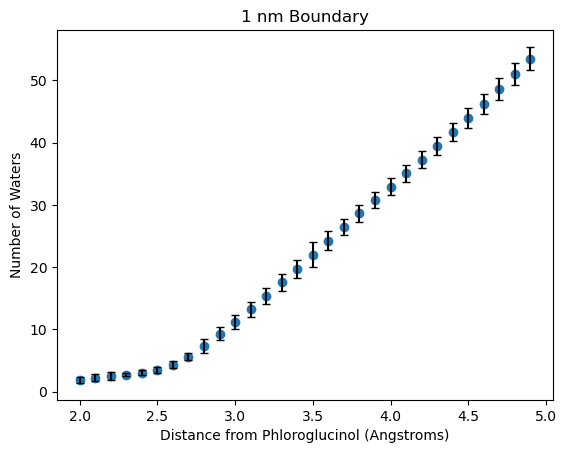

In [29]:
plt.scatter(distances,avg_neighbors)
plt.errorbar(distances,avg_neighbors,yerr=std_neighbors,capsize=3,color='black',fmt='none')
plt.ylabel('Number of Waters')
plt.xlabel('Distance from Phloroglucinol (Angstroms)')
plt.title('1 nm Boundary')

[3. 3. 6. ... 5. 2. 4.]
Average number of h-bonded waters = 4.172730907636946 +/- 1.680542296461549


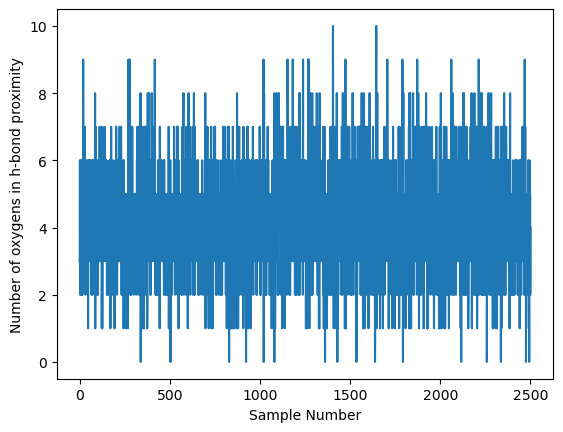

In [30]:
# Possible hydrogen bonds to OH groups

h_bond_traj = []
for ts in u.trajectory:
    pg = u.select_atoms("resname PG")
    num_pg = len(pg) // 15
    close = u.select_atoms(f"name OW and around 2.6 (name HH1 or name HH2 or name HH3)")
    hydrogen_bonds = u.select_atoms(f"name OW and around 3.3 (name HH1 or name HH2 or name HH3)")
    num_hb_waters = (len(hydrogen_bonds) - len(close)) / num_pg
    h_bond_traj.append(num_hb_waters)
h_bond_traj = np.array(h_bond_traj)
print(h_bond_traj)
plt.plot(h_bond_traj)
plt.ylabel('Number of oxygens in h-bond proximity')
plt.xlabel('Sample Number')

decorr_time = autocorr1D(h_bond_traj)
hb_ind_samples = block_average(h_bond_traj,decorr_time)
print(f'Average number of h-bonded waters = {np.mean(hb_ind_samples)} +/- {np.std(hb_ind_samples)}')